## Linear Regression and Its Extensions
This notebook will show implementations of various extensions of linear regression,
ranging from the vanilla OLS, ridge regression, lasso regression to LAR.

We will be using the diabetes dataset from the scikit-learn package to demonstrate.



In [10]:
#load required libraries
import numpy as np
#load diabetes dataset
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()

In [11]:
from sklearn.model_selection import train_test_split
#retrieve data and target
#print out dimensions to check if loaded correctly
print(diabetes["data"].shape)
print(diabetes["target"].shape)

#set X,y 
X=diabetes["data"]
y=diabetes["target"]

#set test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


(442, 10)
(442,)


2900.1936284934804


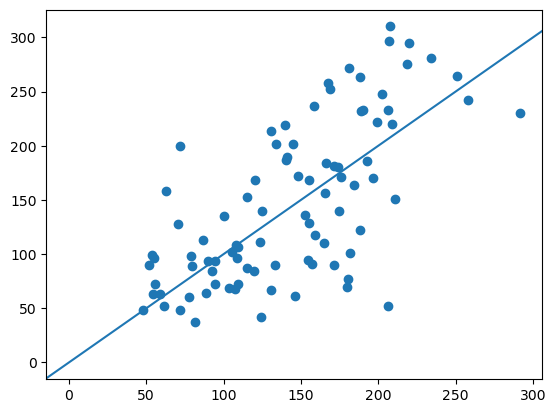

In [19]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
OLS=LinearRegression()
OLS.fit(X_train,y_train)

y_pred=OLS.predict(X_test)
mse_OLS=mean_squared_error(y_test,y_pred)
print(mse_OLS)

#In general, we want the predicted values to vary in the same direction as the observed values
#therefore, we plot a graph of predicted vs observed as a visual check if the predicted correlates positively with the observed
import matplotlib.pyplot as plt
plt.scatter(y_pred,y_test)
plt.axline(xy1=(0,0),slope=1)

2855.1967296869775


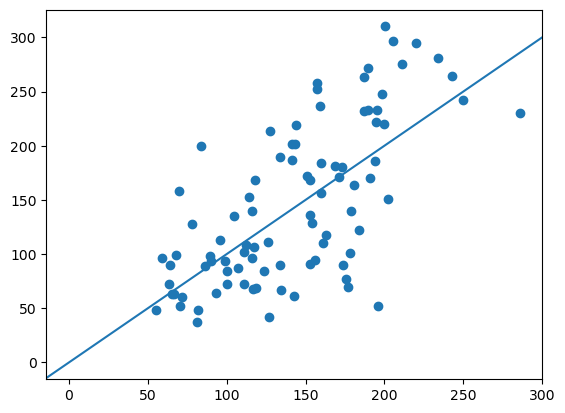

In [13]:
#Ridge
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
Ridge_reg=Ridge()

#hyperparameter grid
grid={"alpha": np.linspace(0.001,1,10)}
#run grid search to choose best alpha- regularization paramter for ridge regression
clf=GridSearchCV(Ridge_reg,grid,scoring="neg_mean_squared_error",cv=5)
clf.fit(X_train,y_train)
alpha=clf.best_params_["alpha"]

#fit ridge regression with best alpha chosen from cv
Ridge_reg=Ridge(alpha=alpha)
Ridge_reg.fit(X_train,y_train)

y_pred=Ridge_reg.predict(X_test)
mse_Ridge=mean_squared_error(y_test,y_pred)
print(mse_Ridge)

import matplotlib.pyplot as plt
plt.scatter(y_pred,y_test)
plt.axline(xy1=(0,0),slope=1)

Notice that the MSE for Ridge Model is better than the MSE for the OLS model? 

Ridge regression avoids the problem of inverting a sparse X^T X matrix that may cause numerical errors  
The lambda term also regularizes the magnitude of the weights on the inputs, avoiding overfitting. 

This allows the model to generalize better on unseen data-which is we we want!



2811.3851000470777


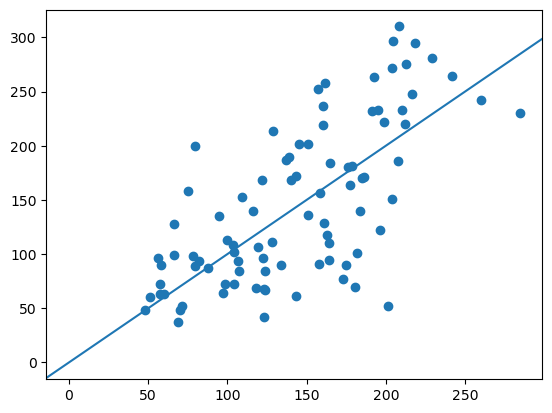

In [33]:
#This section uses Sequential Feature Selection to perform forward and backward selction

from sklearn.feature_selection import SequentialFeatureSelector

OLS=LinearRegression()
#change to direction=backward to perform forward selection
sfs_OLS=SequentialFeatureSelector(OLS,direction="forward",scoring="neg_mean_squared_error",cv=5)
sfs_OLS.fit(X_train,y_train)

#create mask for selected features to be used in OLS
feat_sel=sfs_OLS.support_
OLS.fit(X_train[:,feat_sel],y_train)

y_pred=OLS.predict(X_test[:,feat_sel])
mse_sfs_OLS=mean_squared_error(y_test,y_pred)
print(mse_sfs_OLS)

import matplotlib.pyplot as plt
plt.scatter(y_pred,y_test)
plt.axline(xy1=(0,0),slope=1)

We notice that the MSE for forward selection is lower than Ridge - probably due to careful selection of features reducing the number of features of the model? 

Reducing number of features reduces variance of the estimator and avoiding overfitting.

2798.1893931740924


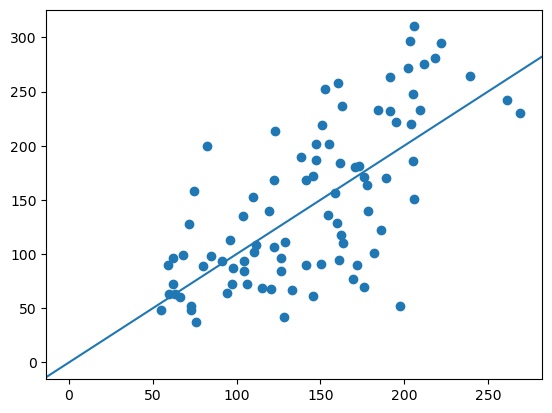

In [35]:
#Lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
Lasso_reg=Lasso()

#hyperparameter grid
grid={"alpha": np.linspace(0.001,1,10)}
#run grid search to choose best alpha- regularization paramter for ridge regression
clf=GridSearchCV(Lasso_reg,grid,scoring="neg_mean_squared_error",cv=5)
clf.fit(X_train,y_train)
alpha=clf.best_params_["alpha"]

#fit ridge regression with best alpha chosen from cv
Lasso_reg=Lasso(alpha=alpha)
Lasso_reg.fit(X_train,y_train)

y_pred=Lasso_reg.predict(X_test)
mse_Lasso=mean_squared_error(y_test,y_pred)
print(mse_Lasso)

import matplotlib.pyplot as plt
plt.scatter(y_pred,y_test)
plt.axline(xy1=(0,0),slope=1)

## Forward selection vs Ridge

We notice that the MSE for Lasso is lower than Ridge - probably due to careful selection of features reducing the number of features of the model? 

Reducing number of features reduces variance of the estimator and avoiding overfitting.

In [76]:
#features selected by forward selection
print(list(np.array(diabetes["feature_names"])[feat_sel]))

#features selected by lasso
print(list(np.array(diabetes["feature_names"])[np.abs(Lasso_reg.coef_)>0.01]))

['sex', 'bmi', 'bp', 's3', 's5']
['sex', 'bmi', 'bp', 's1', 's3', 's5', 's6']
